In [390]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [391]:
dataset_path = r'./datasus/part-00000-0b7ee8fc-4d40-4b71-bec3-5d9ddbf54ec9.c000.csv'
datasus_df = pd.read_csv(dataset_path, sep=';')

C:\Users\Quest\AppData\Local\Temp\ipykernel_9132\1994711914.py:2: DtypeWarning: Columns (12,26,31,33,34,37,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  datasus_df = pd.read_csv(dataset_path, sep=';')


# Verificando informações gerais sobre o dataset

In [392]:
datasus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146555 entries, 0 to 146554
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           146553 non-null  object 
 1   profissionalSaude                  146553 non-null  object 
 2   racaCor                            146529 non-null  object 
 3   outrosSintomas                     36211 non-null   object 
 4   outrasCondicoes                    5405 non-null    object 
 5   profissionalSeguranca              146407 non-null  object 
 6   cbo                                5470 non-null    object 
 7   condicoes                          15193 non-null   object 
 8   sexo                               146555 non-null  object 
 9   estado                             146555 non-null  object 
 10  estadoIBGE                         142722 non-null  object 
 11  municipio                          1465

In [393]:
datasus_df.describe()

municipioNotificacaoIBGE  codigoEstrategiaCovid  \
count              1.404580e+05          141025.000000   
mean               2.921072e+06               1.102627   
std                2.521214e+04               0.360049   
min                1.600600e+06               1.000000   
25%                2.913903e+06               1.000000   
50%                2.927408e+06               1.000000   
75%                2.927408e+06               1.000000   
max                2.933604e+06               3.000000   

       codigoBuscaAtivaAssintomatico  codigoTriagemPopulacaoEspecifica  \
count                    9227.000000                       2667.000000   
mean                        2.757993                          4.360330   
std                         1.254716                          1.284789   
min                         1.000000                          1.000000   
25%                         2.000000                          5.000000   
50%                         2.000000                          5.000000   
75%                         4.000000                          5.000000   
max                         4.000000                          5.000000   

       codigoLocalRealizacaoTestagem  codigoEstadoTeste1  codigoTipoTeste1  \
count                  141017.000000       112478.000000     112460.000000   
mean                        1.342859            2.996417          2.652134   
std                         1.333607            0.569171          0.931397   
min                         1.000000            1.000000          1.000000   
25%                         1.000000            3.000000          3.000000   
50%                         1.000000            3.000000          3.000000   
75%                         1.000000            3.000000          3.000000   
max                         7.000000            4.000000          9.000000   

       codigoFabricanteTeste1  codigoResultadoTeste1  codigoEstadoTeste2  ...  \
count            67122.000000           87499.000000         4879.000000  ...   
mean               844.161080               1.757712            2.864111  ...   
std                 82.349766               0.433219            0.739683  ...   
min                  1.000000               1.000000            1.000000  ...   
25%                792.000000               2.000000            3.000000  ...   
50%                915.000000               2.000000            3.000000  ...   
75%                915.000000               2.000000            3.000000  ...   
max                915.000000               3.000000            4.000000  ...   

       codigoResultadoTeste2  codigoEstadoTeste3  codigoTipoTeste3  \
count            3390.000000          313.000000        313.000000   
mean                1.757817            2.856230          2.757188   
std                 0.449309            0.600562          1.464917   
min                 1.000000            1.000000          1.000000   
25%                 1.000000            3.000000          1.000000   
50%                 2.000000            3.000000          3.000000   
75%                 2.000000            3.000000          3.000000   
max                 3.000000            4.000000          9.000000   

       codigoFabricanteTeste3  codigoResultadoTeste3  codigoEstadoTeste4  \
count              156.000000             272.000000           86.000000   
mean               799.730769               1.750000            2.872093   
std                134.220298               0.450502            0.548721   
min                 91.000000               1.000000            1.000000   
25%                715.000000               1.000000            3.000000   
50%                792.000000               2.000000            3.000000   
75%                915.000000               2.000000            3.000000   
max                915.000000               3.000000            4.000000   

       codigoTipoTeste4  codigoFabricanteTeste4  codigoResultadoTest

In [394]:
datasus_df['classificacaoFinal'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 146555 entries, 0 to 146554
Series name: classificacaoFinal
Non-Null Count  Dtype 
--------------  ----- 
93379 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


# Verificação de valores nulos

<Axes: >

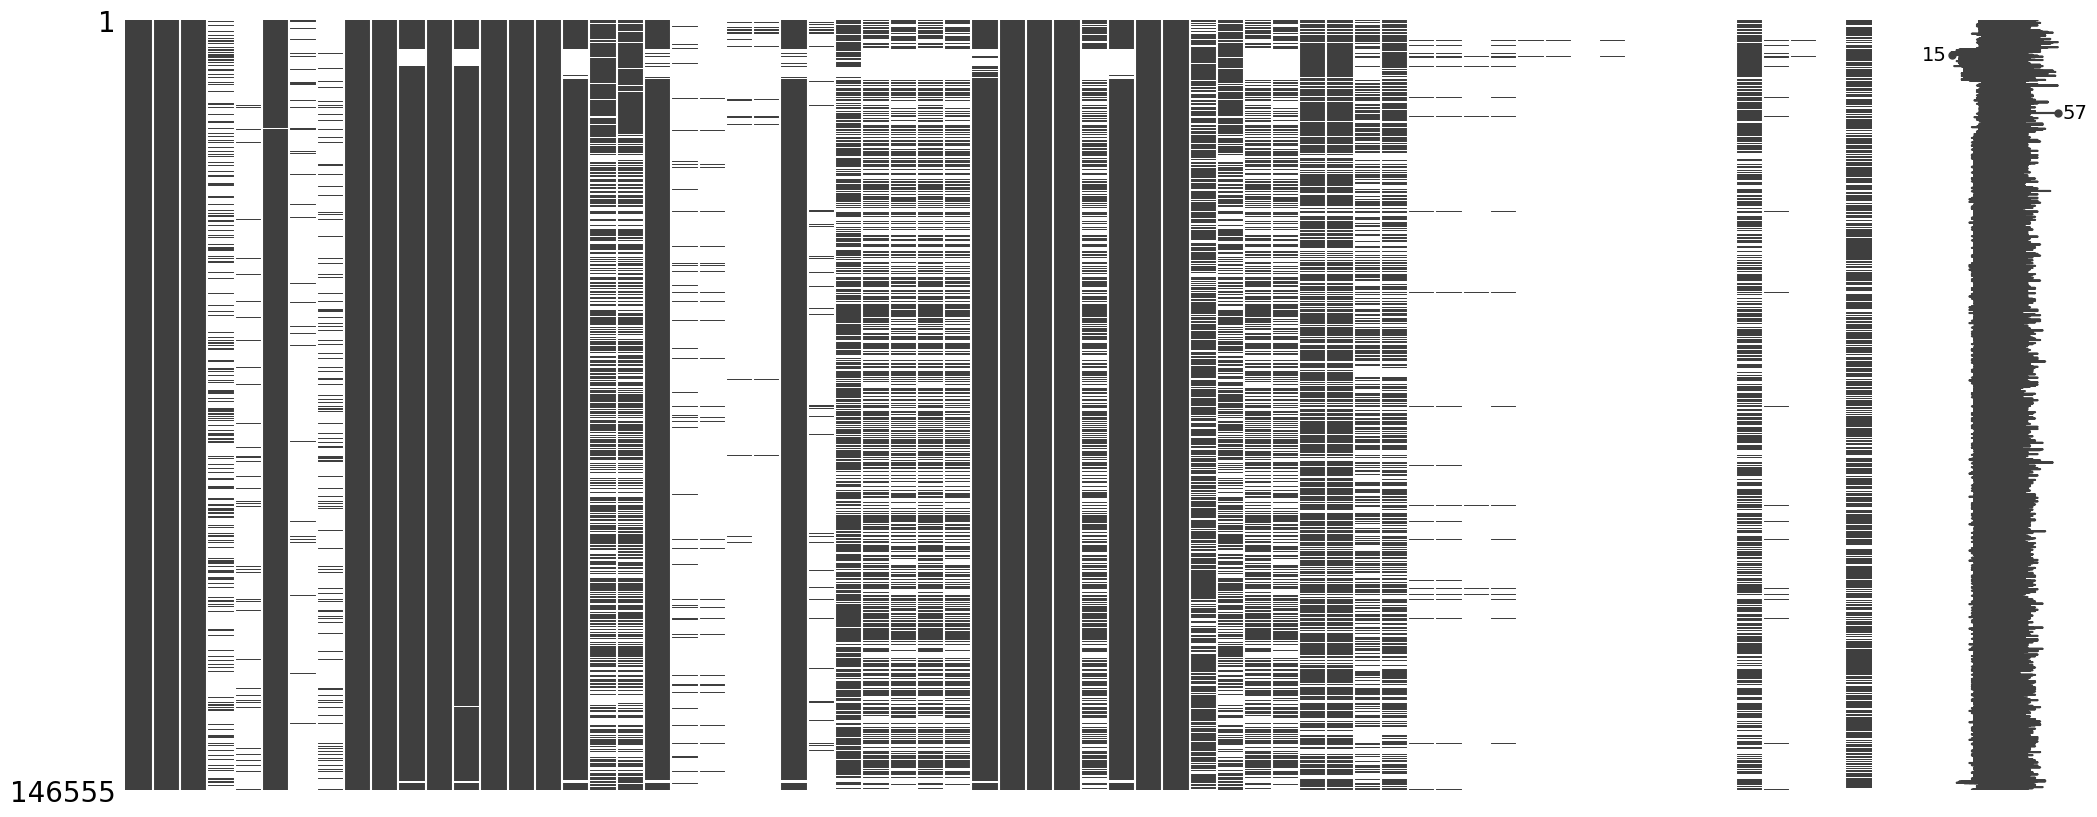

In [395]:
msno.matrix(datasus_df)

# Conferindo features categóricas e numéricas

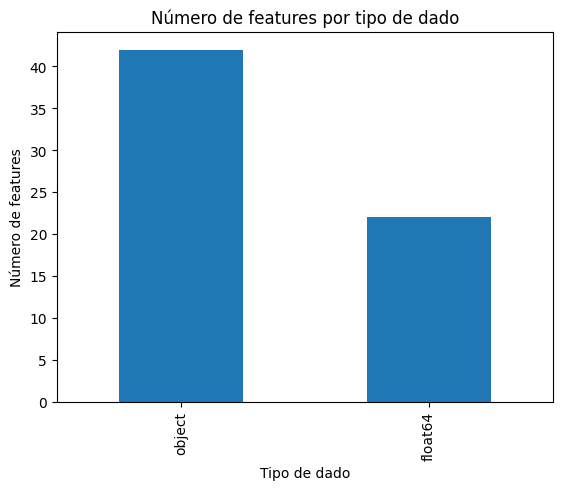

In [396]:
fig, ax = plt.subplots()
datasus_df.dtypes.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Número de features por tipo de dado')
ax.set_xlabel('Tipo de dado')
ax.set_ylabel('Número de features')
plt.show()

# Analisando imbalanceamento da feature alvo

In [397]:
datasus_df.dropna(subset=['classificacaoFinal'], inplace=True)

In [398]:
datasus_df['classificacaoFinal'].value_counts()

classificacaoFinal
Descartado                           41639
Síndrome Gripal Não Especificada     31442
Confirmado Laboratorial              16891
Confirmado Clínico-Epidemiológico     2896
Confirmado por Critério Clínico        473
Confirmado Clínico-Imagem               38
Name: count, dtype: int64

# Lidando com a coluna "Sintomas"

In [399]:
datasus_df['sintomas'].fillna('Assintomático', inplace=True)
datasus_df['listaSintomas'] = datasus_df['sintomas'].str.split(',')
datasus_df.dropna(subset=['listaSintomas'], inplace=True)
datasus_df['listaSintomas'] = datasus_df['listaSintomas'].apply(lambda x: [s.lower().strip() for s in x])
datasus_df['idPaciente'] = datasus_df.index
sintomas_df = datasus_df.explode('listaSintomas')
encoded_df = pd.get_dummies(sintomas_df['listaSintomas'])
agrupado_df = sintomas_df[['idPaciente']].join(encoded_df).groupby('idPaciente').max()
resultado_df = pd.merge(datasus_df.drop(columns=['listaSintomas']), agrupado_df, left_index=True, right_index=True)
resultado_df.drop(columns=['', 'sintomas'], inplace=True)

C:\Users\Quest\AppData\Local\Temp\ipykernel_9132\2752196585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datasus_df['sintomas'].fillna('Assintomático', inplace=True)


# Lidando com a coluna "Condições"

In [400]:
datasus_df['condicoes'].isna().sum()

np.int64(85333)

In [401]:
datasus_df['condicoes'].fillna('Nenhuma condição informada', inplace=True)

C:\Users\Quest\AppData\Local\Temp\ipykernel_9132\1663760949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datasus_df['condicoes'].fillna('Nenhuma condição informada', inplace=True)


In [402]:
datasus_df['condicoes'].unique()

array(['Nenhuma condição informada', 'Gestante', 'Outros',
       'Imunossupressão', 'Obesidade', 'Diabetes',
       'Diabetes, Doenças cardíacas crônicas', 'Diabetes, Obesidade',
       'Doenças cardíacas crônicas',
       'Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)',
       'Doenças respiratórias crônicas descompensadas',
       'Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)',
       'Outros, Diabetes, Doenças respiratórias crônicas descompensadas',
       'Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas',
       'Diabetes, Outros', 'Doenças cardíacas crônicas, Obesidade',
       'Imunossupressão, Diabetes, Doenças cardíacas crônicas',
       'Doenças cardíacas crônicas, Gestante',
       'Doenças cardíacas crônicas, Diabetes',
       'Obesidade, Doenças cardíacas crônicas',
       'Imunossupressão, Diabetes',
       'Doenças respiratórias crônicas descompensadas, Outros',
       'Outros, Diabetes',
       'Doença

In [403]:
datasus_df['listaCondicoes'] = datasus_df['condicoes'].str.split(',')
datasus_df['listaCondicoes'] = datasus_df['listaCondicoes'].apply(lambda x: [s.lower().strip() for s in x])

condicoes_df = datasus_df.explode('listaCondicoes')
encoded_df = pd.get_dummies(condicoes_df['listaCondicoes'])
agrupado_df = sintomas_df[['idPaciente']].join(encoded_df).groupby('idPaciente').max()
agrupado_df.drop(columns=['4 ou 5)'], inplace=True)
resultado_df = pd.merge(resultado_df, agrupado_df, left_index=True, right_index=True)
resultado_df.drop(columns=['condicoes'], inplace=True)

In [404]:
resultado_df.columns

Index(['profissionalSaude', 'racaCor', 'outrosSintomas', 'outrasCondicoes',
       'profissionalSeguranca', 'cbo', 'sexo', 'estado', 'estadoIBGE',
       'municipio', 'municipioIBGE', 'origem', 'estadoNotificacao',
       'municipioNotificacao', 'municipioNotificacaoIBGE', 'evolucaoCaso',
       'classificacaoFinal', 'codigoEstrategiaCovid',
       'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico',
       'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica',
       'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem',
       'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose',
       'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose',
       'codigoContemComunidadeTradicional', 'source_id', 'excluido',
       'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE',
       'totalTestesRealizados', 'dataNotificacao', 'dataInicioSintomas',
       'dataEncerramento', 'dataPrimeiraDose', 'dataSegundaDose',
       'codigoEstado

# Lidando com a coluna "Outros Sintomas"
A coluna "outrosSintomas" necessita do mesmo tratamento que a coluna "sintomas", mas para propósitos de economia computacional, vamos dropar ela por hora

In [405]:
for sintoma in resultado_df['outrosSintomas'].unique():
    print(sintoma)

nan
dor no corpo
DOR NO CORPO
DOR NO CORPO,,DOR NO PEITO
MIALGIA
DOR NO CORPO, CANSAÇO
CANSAÇO
ANOSMIA
SECREÇÃO NASAL
Dor Muscular
mialgia,fadiga
DOR NAS COSTA
GRIPE
ESPIRROS
ROUQUIDAO,DOR NO CORPO ,CONGESTAO NASAL
CEFALEIA,DOR NAS COSTA
DORES NO CORPO
Dor no corpo
DIARREIA
DIARREIA E SANGRAMENTO NASAL
TRIAGEM DE PACIENTE INTERNADO
Detectável:  Vírus Sincicial Respiratório; Rinovírus
fadiga,mialgia
DESCONFORTO RESPIRATORIO
ROQUIDAO
diarreia, dor nos olhos
dor ouvido
VOMITOS
DOR NO CORPO, ESPIRRO
CONGESTÃO NASAL
PNEUMONIA
OLHOS QUEIMANDO
FALTA DE AR, DOR NO CORPO
MIALGIA, PROSTRAÇÃO
DESCONFORTO RESPIRATORIO, TAQUIDISPNEICO
MIALGIA, ADINAMIA, CALAFRIOS, NAUSEAS
mialgia
FADIGA
NAUSEAS,VOMITO, MAL ESTAR
CONGESTAO NASAL E ROUQIDAO
NAUSEAS
VOMITO
FRAQUEZA
ENTUPIMENTO NASAL
CANSAÇO,MIALGIA,DIARREIA
MIALGIA, SEM APETITE
diarreia
MAL ESTAR
MIALGIA;
PROSTRAÇÃO + MIALGIA
diarreia, fadiga, mialgia, nauseas
DOR NAS COSTAS,
CALAFRIOS,CANSAÇO,MIALGIA,DIARREIA
dor no corpo e diarreia
DOR NAS PERNAS
OT

In [406]:
resultado_df.drop(columns=['outrosSintomas', 'outrasCondicoes'], inplace=True)

In [407]:
resultado_df.nunique().sort_values(ascending=False)

idPaciente                         93379
source_id                          93379
dataInicioSintomas                  1541
dataColetaTeste1                    1516
dataNotificacao                     1514
                                   ...  
nenhuma condição informada             2
puérpera (até 45 dias do parto)        2
outros_y                               2
estadoNotificacao                      1
estadoNotificacaoIBGE                  1
Length: 84, dtype: int64

# Dropando colunas insignificantes

## Colunas de data

In [408]:
resultado_df.drop(columns=resultado_df.filter(like='data').columns, inplace=True)
resultado_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93379 entries, 0 to 146554
Data columns (total 75 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   profissionalSaude                                                       93377 non-null  object 
 1   racaCor                                                                 93353 non-null  object 
 2   profissionalSeguranca                                                   93277 non-null  object 
 3   cbo                                                                     3654 non-null   object 
 4   sexo                                                                    93379 non-null  object 
 5   estado                                                                  93379 non-null  object 
 6   estadoIBGE                                                              89566 non-

## Coluna "source_id"

In [409]:
resultado_df.drop(columns=['source_id'], inplace=True)

## Colunas de códigos
Muitas das colunas que possuem "código" no nome estão como tipo float64, quando na verdade são códigos únicos e categóricos

In [410]:
resultado_df[resultado_df.select_dtypes(include=['float64']).columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93379 entries, 0 to 146554
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   municipioNotificacaoIBGE          87388 non-null  float64
 1   codigoEstrategiaCovid             87947 non-null  float64
 2   codigoBuscaAtivaAssintomatico     5929 non-null   float64
 3   codigoTriagemPopulacaoEspecifica  2201 non-null   float64
 4   codigoLocalRealizacaoTestagem     87937 non-null  float64
 5   codigoEstadoTeste1                77182 non-null  float64
 6   codigoTipoTeste1                  77164 non-null  float64
 7   codigoFabricanteTeste1            45031 non-null  float64
 8   codigoResultadoTeste1             61094 non-null  float64
 9   codigoEstadoTeste2                4166 non-null   float64
 10  codigoTipoTeste2                  4166 non-null   float64
 11  codigoFabricanteTeste2            1516 non-null   float64
 12  codigoRe

In [411]:
resultado_df[resultado_df.filter(like='codigo').columns] = resultado_df.filter(like='codigo').astype('category')
resultado_df[resultado_df.filter(like='codigo').columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93379 entries, 0 to 146554
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   codigoEstrategiaCovid              87947 non-null  category
 1   codigoBuscaAtivaAssintomatico      5929 non-null   category
 2   codigoTriagemPopulacaoEspecifica   2201 non-null   category
 3   codigoLocalRealizacaoTestagem      87937 non-null  category
 4   codigoRecebeuVacina                69752 non-null  category
 5   codigoLaboratorioPrimeiraDose      49934 non-null  category
 6   codigoLaboratorioSegundaDose       44912 non-null  category
 7   codigoContemComunidadeTradicional  89524 non-null  category
 8   codigoDosesVacina                  52979 non-null  category
 9   codigoEstadoTeste1                 77182 non-null  category
 10  codigoTipoTeste1                   77164 non-null  category
 11  codigoFabricanteTeste1             45031 non-

In [412]:
resultado_df[resultado_df.filter(like='codigo').columns].nunique().sort_values(ascending=False)

codigoDosesVacina                    16
codigoLaboratorioPrimeiraDose        15
codigoFabricanteTeste1               15
codigoLaboratorioSegundaDose         14
codigoFabricanteTeste3               10
codigoTipoTeste1                      9
codigoTipoTeste3                      9
codigoTipoTeste2                      8
codigoFabricanteTeste2                8
codigoLocalRealizacaoTestagem         7
codigoTipoTeste4                      6
codigoFabricanteTeste4                6
codigoTriagemPopulacaoEspecifica      5
codigoRecebeuVacina                   5
codigoEstadoTeste4                    4
codigoBuscaAtivaAssintomatico         4
codigoContemComunidadeTradicional     4
codigoEstadoTeste1                    4
codigoEstadoTeste3                    4
codigoEstadoTeste2                    4
codigoEstrategiaCovid                 3
codigoResultadoTeste2                 3
codigoResultadoTeste1                 3
codigoResultadoTeste3                 3
codigoResultadoTeste4                 3


# Tratando colunas categóricas do tipo "object"

In [413]:
resultado_df.select_dtypes(include=['object']).columns

Index(['profissionalSaude', 'racaCor', 'profissionalSeguranca', 'cbo', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem',
       'estadoNotificacao', 'municipioNotificacao', 'evolucaoCaso',
       'classificacaoFinal', 'outroBuscaAtivaAssintomatico',
       'outroTriagemPopulacaoEspecifica', 'outroLocalRealizacaoTestagem',
       'lotePrimeiraDose', 'loteSegundaDose', 'excluido', 'validado',
       'estadoNotificacaoIBGE', 'totalTestesRealizados'],
      dtype='object')

In [414]:
resultado_df.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

municipioIBGE                      1121
lotePrimeiraDose                    814
loteSegundaDose                     784
municipio                           739
outroBuscaAtivaAssintomatico        485
municipioNotificacao                322
outroLocalRealizacaoTestagem        297
cbo                                 218
outroTriagemPopulacaoEspecifica     182
estadoIBGE                           24
estado                               24
totalTestesRealizados                12
evolucaoCaso                          7
classificacaoFinal                    6
racaCor                               6
sexo                                  2
profissionalSeguranca                 2
profissionalSaude                     2
origem                                2
validado                              2
excluido                              2
estadoNotificacao                     1
estadoNotificacaoIBGE                 1
dtype: int64

In [415]:
resultado_df.drop(columns=['estadoNotificacao', 'estadoNotificacaoIBGE', 'origem', 'cbo'], inplace=True)

In [418]:
resultado_df.drop(columns=resultado_df.columns[resultado_df.isnull().mean() > 0.9], inplace=True)

In [419]:
resultado_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93379 entries, 0 to 146554
Data columns (total 53 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   profissionalSaude                                                       93377 non-null  object  
 1   racaCor                                                                 93353 non-null  object  
 2   profissionalSeguranca                                                   93277 non-null  object  
 3   sexo                                                                    93379 non-null  object  
 4   estado                                                                  93379 non-null  object  
 5   estadoIBGE                                                              89566 non-null  object  
 6   municipio                                                               93

In [420]:
for col in resultado_df.columns:
    if resultado_df[col].dtype == 'categorical':
        unique_types = resultado_df[col].map(type).unique()
        print(f"Column '{col}' has the following types: {unique_types}")

In [421]:
resultado_df['municipioIBGE'] = resultado_df['municipioIBGE'].fillna(resultado_df['municipioIBGE'].mode()[0])
resultado_df['municipioIBGE'] = resultado_df['municipioIBGE'].apply(lambda x: resultado_df['municipioIBGE'].mode()[0] if x == 'BA' else x)
resultado_df['municipioIBGE'] = resultado_df['municipioIBGE'].apply(lambda x: int(x) if isinstance(x, float) else x)
resultado_df['municipioIBGE'] = resultado_df['municipioIBGE'].apply(lambda x: str(x) if isinstance(x, int) else x)
resultado_df['municipioIBGE'] = resultado_df['municipioIBGE'].astype('category')
resultado_df['evolucaoCaso'] = resultado_df['evolucaoCaso'].fillna('Nenhum')
resultado_df['lotePrimeiraDose'] = resultado_df['lotePrimeiraDose'].fillna('Nenhum')
resultado_df['loteSegundaDose'] = resultado_df['loteSegundaDose'].fillna('Nenhum')
resultado_df['estadoIBGE'] = resultado_df['estadoIBGE'].fillna(resultado_df['estadoIBGE'].mode()[0])
resultado_df['profissionalSeguranca'] = resultado_df['profissionalSeguranca'].fillna(resultado_df['profissionalSeguranca'].mode()[0])
resultado_df['racaCor'] = resultado_df['racaCor'].fillna(resultado_df['racaCor'].mode()[0])
resultado_df['totalTestesRealizados'] = resultado_df['totalTestesRealizados'].apply(lambda x: int(x) if isinstance(x, str) else x)

for column in resultado_df.filter(like='codigo').columns:
    resultado_df[column] = resultado_df[column].fillna(resultado_df[column].mode()[0])

resultado_df['idade'] = resultado_df['idade'].fillna(resultado_df['idade'].mean())
resultado_df['municipioNotificacaoIBGE'] = resultado_df['municipioNotificacaoIBGE'].fillna(resultado_df['municipioIBGE'])

In [422]:
def converter_para_coluna_bool(df, col):
    df[col] = df[col].apply(lambda x: x.capitalize() if isinstance(x, str) else x)
    df[col] = df[col].map({'False': False, 'True': True})
    df[col] = df[col].astype('bool')

In [423]:
converter_para_coluna_bool(resultado_df, 'excluido')
converter_para_coluna_bool(resultado_df, 'validado')

In [424]:
for column in resultado_df.select_dtypes(include=['object']).columns:
    resultado_df[column] = resultado_df[column].astype('category')

# Solucionando a falta de balanceamento no target "classificacaoFinal"


In [425]:
fig = px.histogram(resultado_df, x='classificacaoFinal', title='Distribuição das classes na variável alvo')
fig.show()

In [426]:
resultado_df['classificacaoFinal'] = resultado_df['classificacaoFinal'].apply(lambda x: 'positivo' if 'confirmado' in x.lower() else x)
resultado_df['classificacaoFinal'] = resultado_df['classificacaoFinal'].apply(lambda x: 'negativo' if 'descartado' in x.lower() else x)

In [427]:
fig = px.histogram(resultado_df, x='classificacaoFinal', title='Distribuição das classes na variável alvo após condensar categorias')
fig.show()

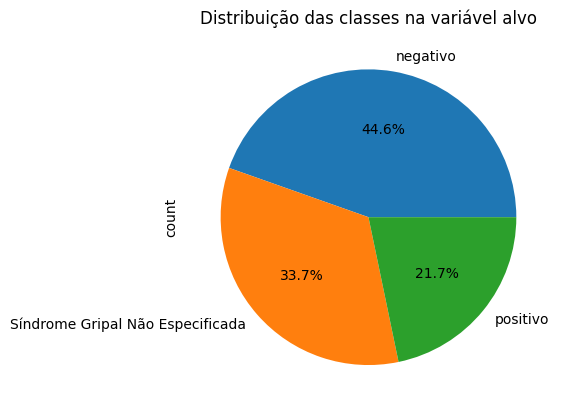

In [428]:
fig, ax = plt.subplots()
resultado_df['classificacaoFinal'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Distribuição das classes na variável alvo')
plt.show()

In [429]:
label_encoder = LabelEncoder()
resultado_df['classificacaoFinal'] = label_encoder.fit_transform(resultado_df['classificacaoFinal'])

for column in resultado_df.drop(columns=['classificacaoFinal']).select_dtypes(include=['category']).columns:
    encoded_df = pd.get_dummies(resultado_df[column], prefix=column)
    resultado_df = pd.concat([resultado_df, encoded_df], axis=1)
    resultado_df.drop(columns=[column], inplace=True)

In [433]:
resultado_df.to_csv(r'./datasus/datasus_preprocessed_condensed_large.csv', index=False)